# Assignment- Linear Regression
## CAR PRICE

#### Problem Statement:

Build a multiple linear regression model for the prediction of car prices

They have contracted an automobile consulting company to understand the factors on which the pricing of cars depends. Specifically, they want to understand the factors affecting the pricing of cars in the American market, since those may be very different from the Chinese market. The company wants to know:

Which variables are significant in predicting the price of a car
How well those variables describe the price of a car
Based on various market surveys, the consulting firm has gathered a large dataset of different types of cars across the Americal market. 

## Step 1: Reading and Understanding the Data

Let us first import NumPy and Pandas and read the Car Price Data Set

In [1]:
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Import numpy and Pandas library
import numpy as np
import pandas as pd

In [3]:
##Set Display option for rows and column as 120 so that it will display maximum rows and column
pd.set_option('display.max_columns', 120)
pd.set_option('display.max_rows', 120)

#####  Upload  Car Price Data

In [4]:
## Upload Car Price Data
car_price = pd.read_csv("C:/Users/Richa/Desktop/upgrad/EDALOANCASE/CarPrice_Assignment.csv")


In [5]:
# Check the head of the dataset
car_price.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


- Inspect the various aspects of the Car Price dataframe

In [6]:
# Check the Shape of data
car_price.shape

(205, 26)

In [7]:
# Check info of Data
car_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
car_ID              205 non-null int64
symboling           205 non-null int64
CarName             205 non-null object
fueltype            205 non-null object
aspiration          205 non-null object
doornumber          205 non-null object
carbody             205 non-null object
drivewheel          205 non-null object
enginelocation      205 non-null object
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginetype          205 non-null object
cylindernumber      205 non-null object
enginesize          205 non-null int64
fuelsystem          205 non-null object
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm      

In [8]:
# Describe Data
car_price.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


- Check for Missing Value in Any Column 

In [9]:
## Check for missing value in Any Column
round(100*(car_price.isnull().sum()/len(car_price.index)), 2)

car_ID              0.0
symboling           0.0
CarName             0.0
fueltype            0.0
aspiration          0.0
doornumber          0.0
carbody             0.0
drivewheel          0.0
enginelocation      0.0
wheelbase           0.0
carlength           0.0
carwidth            0.0
carheight           0.0
curbweight          0.0
enginetype          0.0
cylindernumber      0.0
enginesize          0.0
fuelsystem          0.0
boreratio           0.0
stroke              0.0
compressionratio    0.0
horsepower          0.0
peakrpm             0.0
citympg             0.0
highwaympg          0.0
price               0.0
dtype: float64

#### There is no any Null / Missing Value in Any Column 

In [10]:
## Check if there is any duplicated value in Data set
sum(car_price.duplicated())

0

#### There is no Duplicate Value in Any Column 

In [11]:
#Remove the model name from car name , Keep only the make name
car_price['CarName'], car_price['CarName2']= car_price['CarName'].str.split(' ',1).str

In [12]:
# show the unique value for car name 
car_price['CarName'].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

In [13]:
## Convert all value to lowercase
car_price['CarName']=car_price['CarName'].str.lower()

#Print Car Price df to check if values are convert successfully
car_price['CarName'].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

In [14]:
# Correct Car name impurities 

def carname1 (char1):
    
    if char1 == 'maxda':
        return 'mazda'
    if char1 == 'porcshce':
        return 'porsche'
    if char1 == 'toyouta':
        return 'toyota'
    if char1 == 'vokswagen' or char1 == 'vw':
        return 'volkswagen'
    else:
        return char1

car_price['CarName'] = car_price['CarName'].apply(carname1)

#Print Car Price df to check if values are convert successfully
car_price['CarName'].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

In [15]:
# As Car id having unique value for each row and does not contain any important value for analysis so it can be dropped

car_price.drop(["CarName2" , "car_ID" ], axis = 1 , inplace = True)
car_price.head()

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [16]:
#As Price is our Dependent variable so lets make it first varibale of DF 
df_car_price1 = car_price.pop('price')
df_car_price1.head()
car_price = pd.concat([df_car_price1, car_price], axis = 1)
car_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 25 columns):
price               205 non-null float64
symboling           205 non-null int64
CarName             205 non-null object
fueltype            205 non-null object
aspiration          205 non-null object
doornumber          205 non-null object
carbody             205 non-null object
drivewheel          205 non-null object
enginelocation      205 non-null object
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginetype          205 non-null object
cylindernumber      205 non-null object
enginesize          205 non-null int64
fuelsystem          205 non-null object
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm    


## Step 2: Visualising the Data & EDA 

Let's now spend some time doing what is arguably the most important step - **understanding the data**.
- If there is some obvious multicollinearity going on, this is the first place to catch it
- Here's where you'll also identify if some predictors directly have a strong association with the outcome variable

We'll visualise our data using `matplotlib` and `seaborn`.

In [17]:
## ADDseaborn and matplotlib library
import matplotlib.pyplot as plt
import seaborn as sns

#### Visualising Numeric Variables

Let's make a pairplot of all the numeric variables

<Figure size 1800x1800 with 0 Axes>

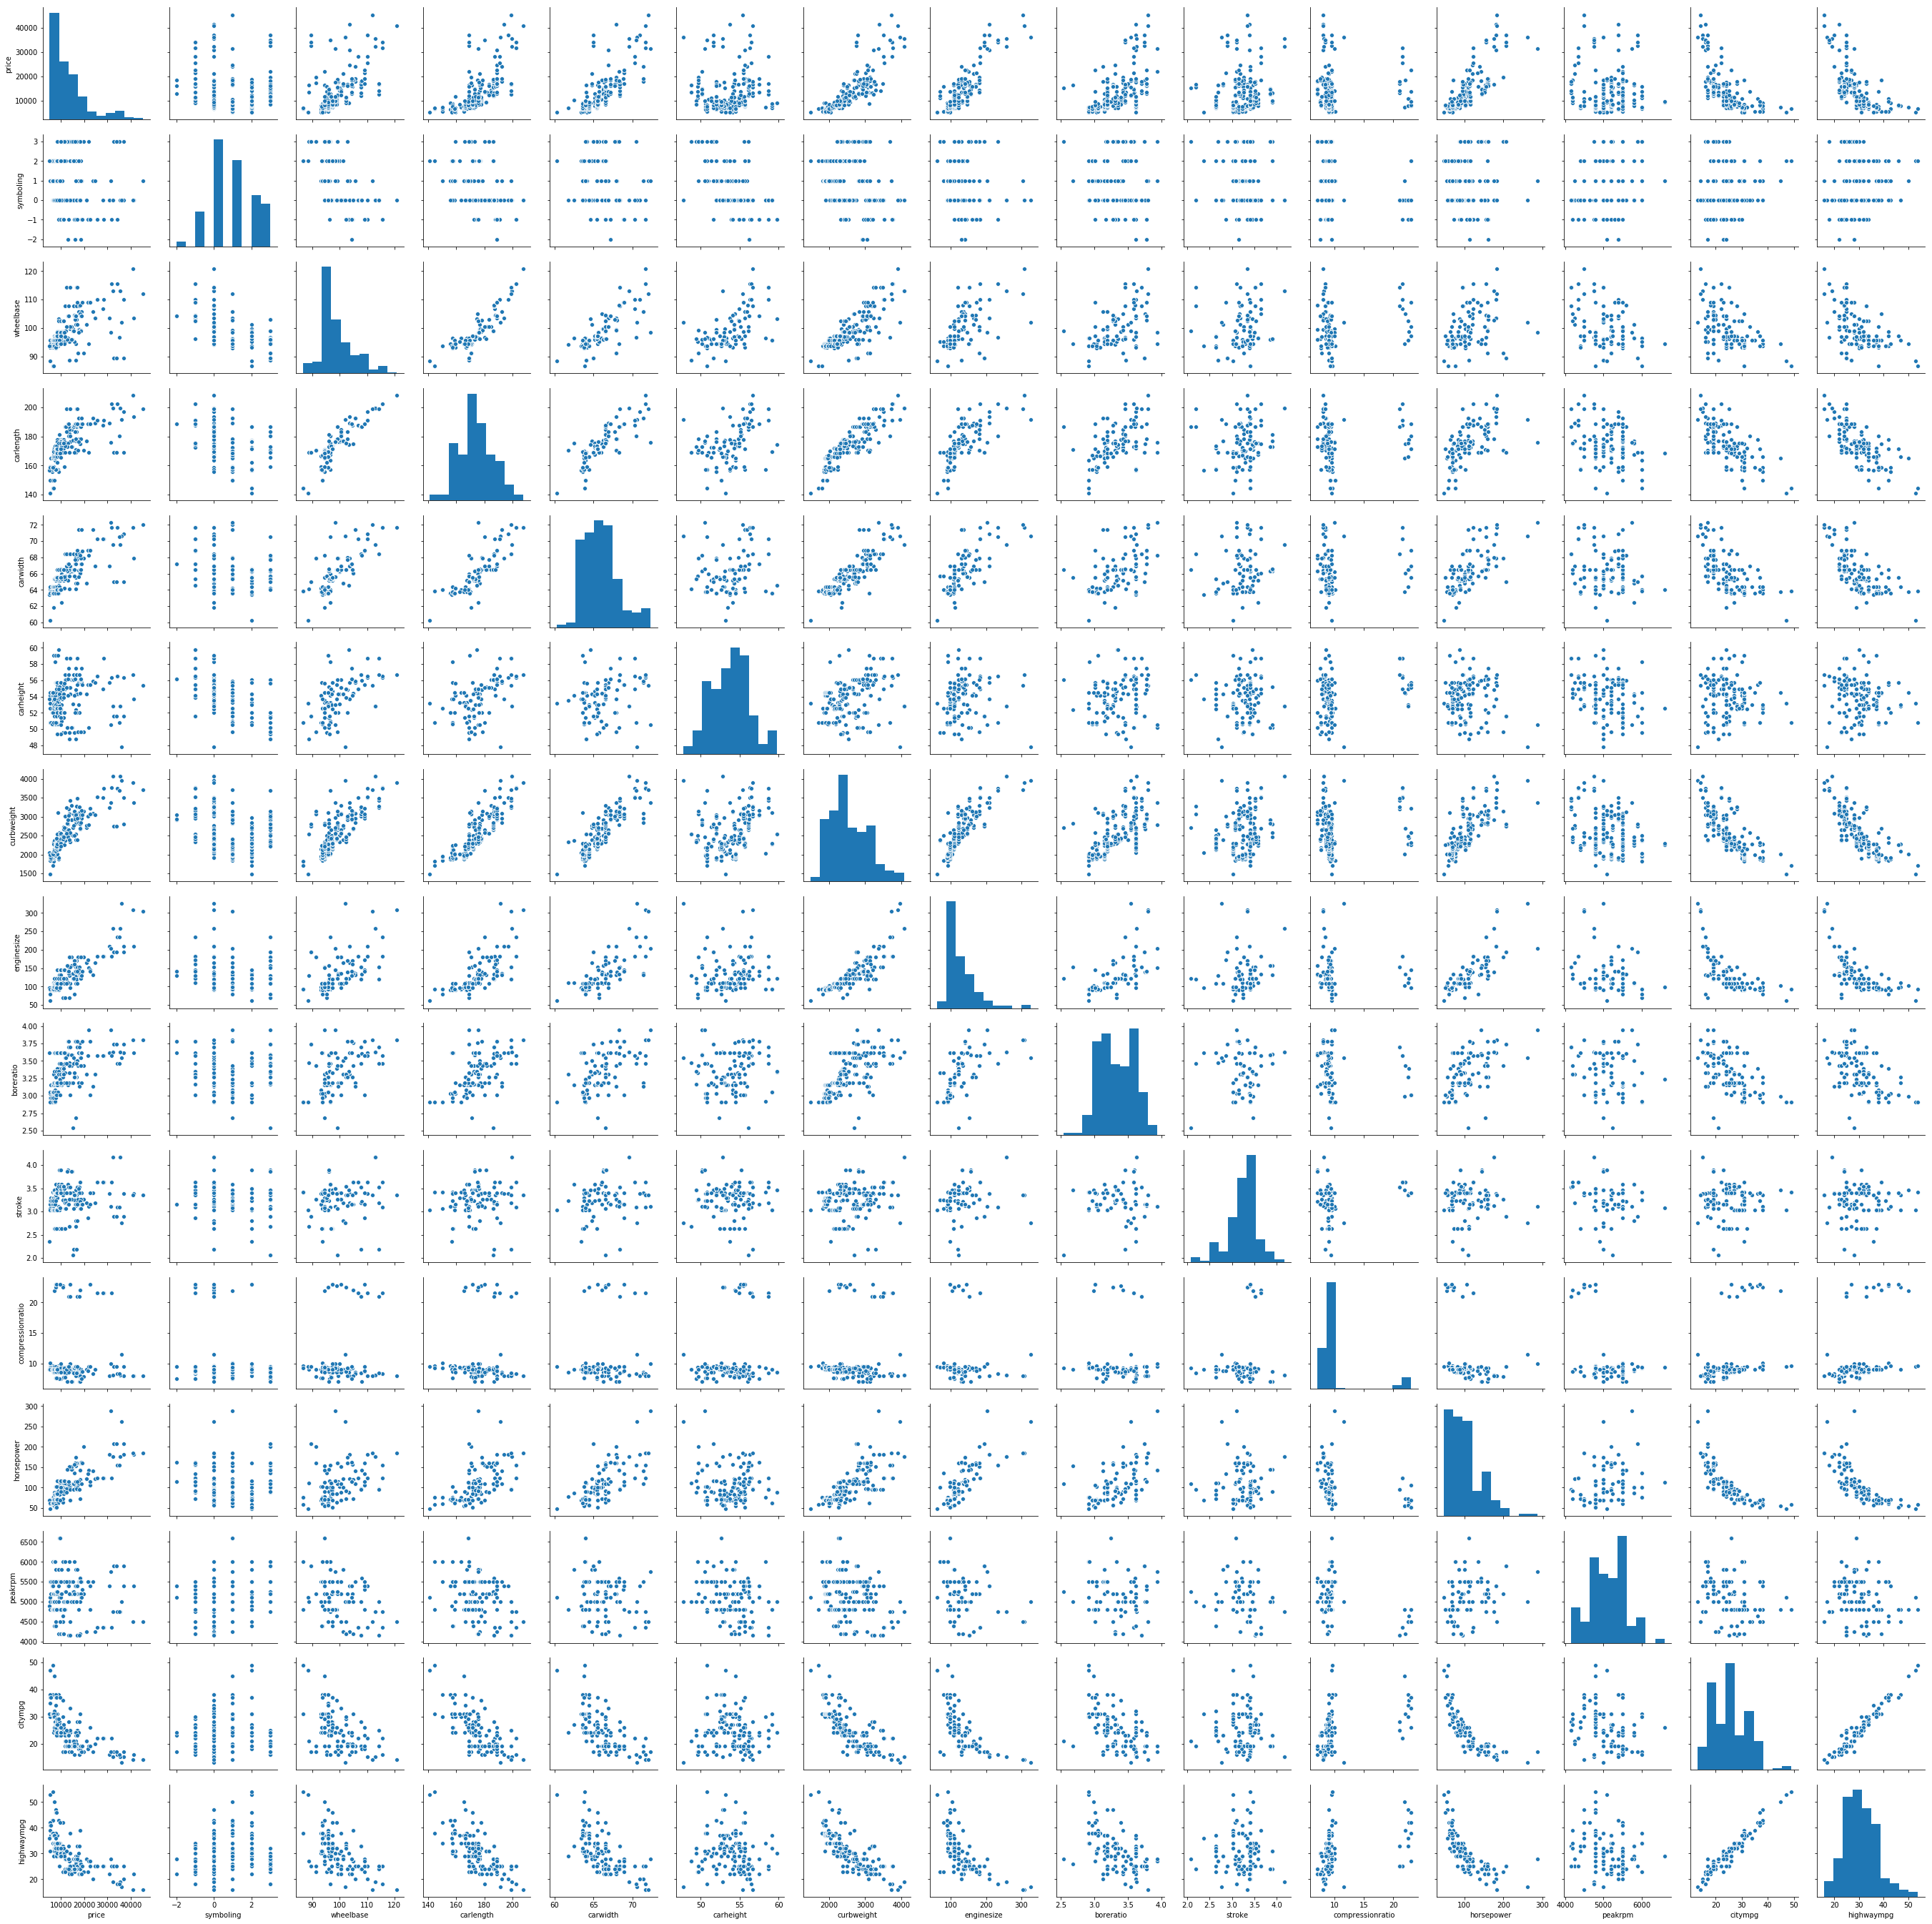

In [18]:
plt.figure(figsize=(25, 25))

sns.pairplot(car_price)
plt.show()

#### Visualising Categorical Variables

As you might have noticed, there are a few categorical variables as well. Let's make a boxplot for some of these variables.

###### Univariate Analysis

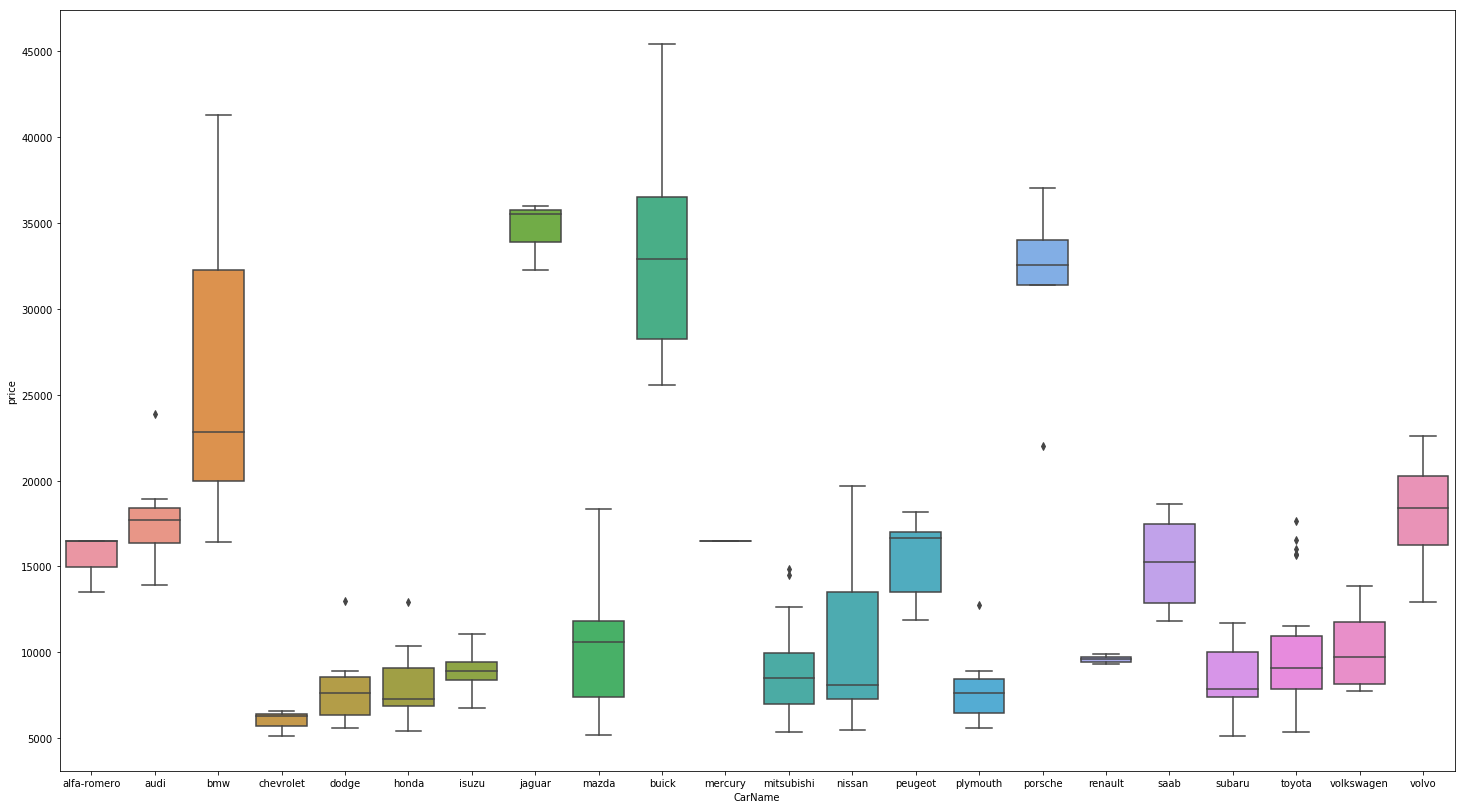

In [19]:
##BoX Plot of Car Name and Price 

plt.figure(figsize=(25, 14))

sns.boxplot(x = 'CarName', y = 'price', data = car_price)
plt.show()

- It can be infer that BMW , Buick , Porsche ,Jaguar are high price car while rest are less then 20K

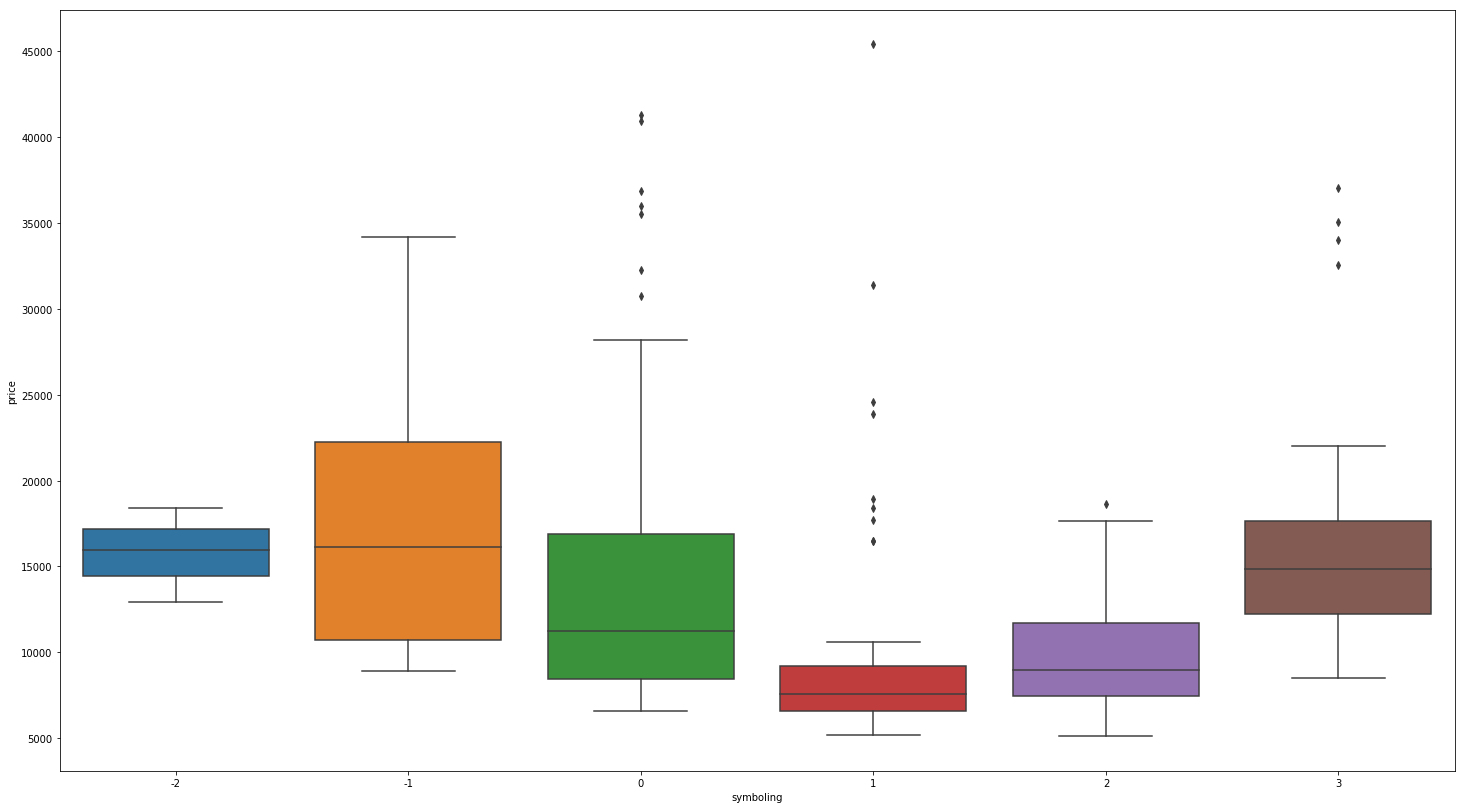

In [20]:
##BoX Plot of Symboling and Price
plt.figure(figsize=(25, 14))

sns.boxplot(x = 'symboling', y = 'price', data = car_price)
plt.show()


#####  symboling are not very Significant for Price so we can drop this feature 



In [21]:
#Drop Symboling
car_price.drop('symboling', axis= 1, inplace = True)

In [22]:
car_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 24 columns):
price               205 non-null float64
CarName             205 non-null object
fueltype            205 non-null object
aspiration          205 non-null object
doornumber          205 non-null object
carbody             205 non-null object
drivewheel          205 non-null object
enginelocation      205 non-null object
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginetype          205 non-null object
cylindernumber      205 non-null object
enginesize          205 non-null int64
fuelsystem          205 non-null object
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm             205 non-null int64
citympg    

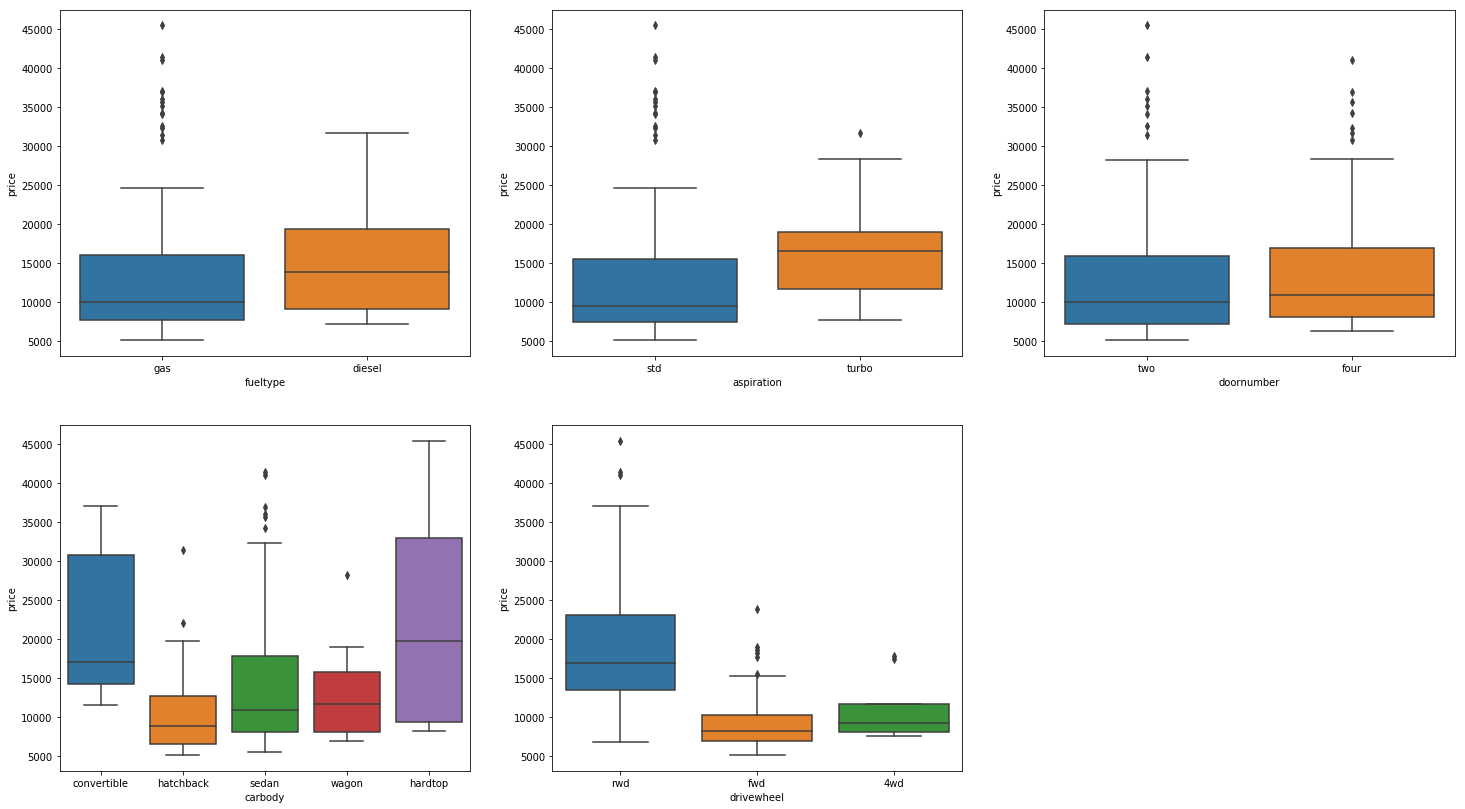

In [23]:
## Univariate Analayis of fueltype, aspiration,doornumber,carbody & drivewheel

plt.figure(figsize=(25, 14))
plt.subplot(2,3,1)
sns.boxplot(x = 'fueltype', y = 'price', data = car_price)
plt.subplot(2,3,2)
sns.boxplot(x = 'aspiration', y = 'price', data = car_price)
plt.subplot(2,3,3)
sns.boxplot(x = 'doornumber', y = 'price', data = car_price)
plt.subplot(2,3,4)
sns.boxplot(x = 'carbody', y = 'price', data = car_price)
plt.subplot(2,3,5)
sns.boxplot(x = 'drivewheel', y = 'price', data = car_price)
plt.show()



#### As per Aspriration Analysis Turbo are more priced than Std.
####  No of Doors are not more Significant
####  Convertible and Hardtoop are slightly are more priced
####   Rwd are more priced than others
####   Diesel cae are more priced than others


In [24]:
# Door number can also be dropper

#Drop Number
car_price.drop('doornumber', axis= 1, inplace = True)

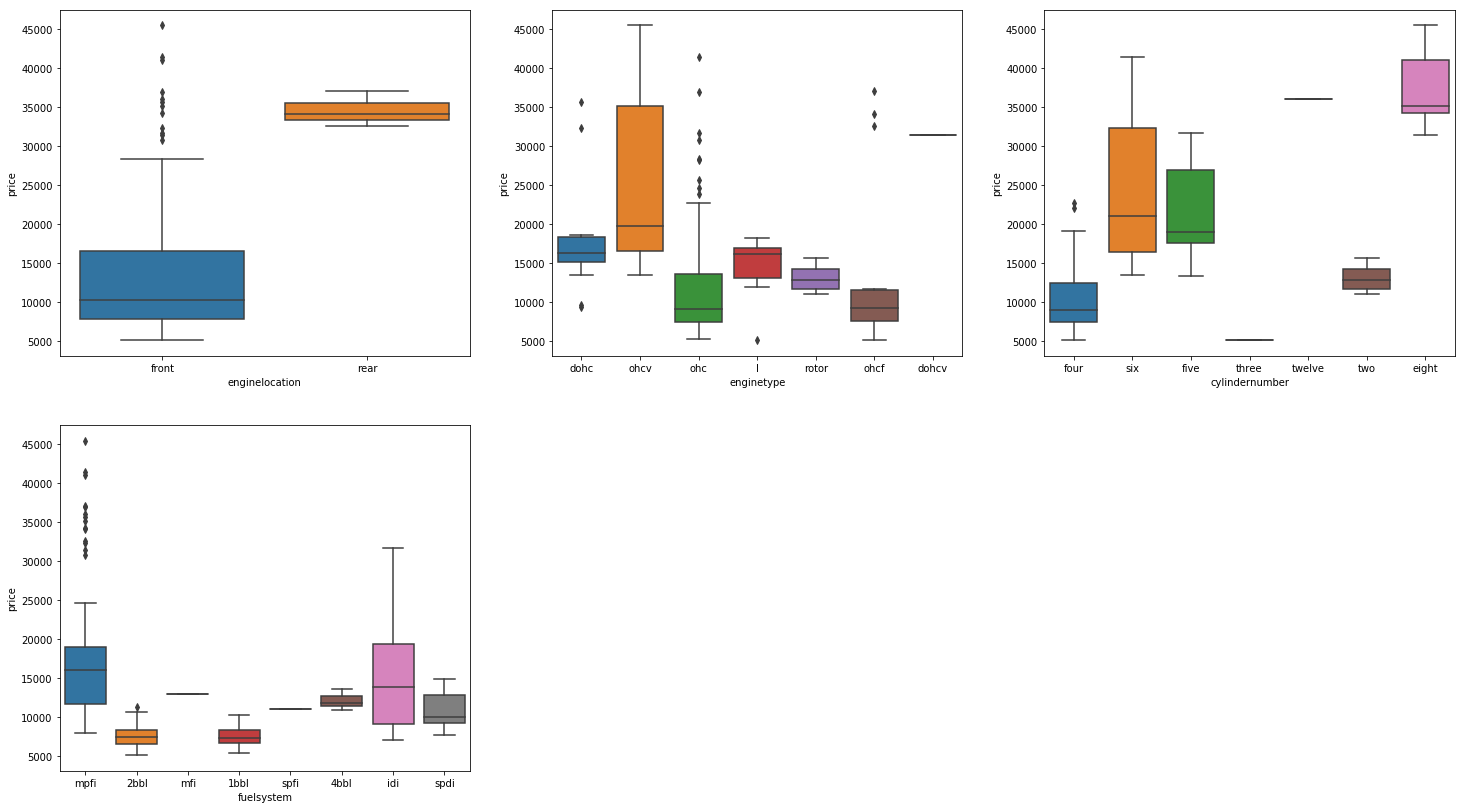

In [25]:
## Univariate Analayis of enginelocation, enginetype,cylindernumber,fuelsystem 

plt.figure(figsize=(25, 14))
plt.subplot(2,3,1)

sns.boxplot(x = 'enginelocation', y = 'price', data = car_price)
plt.subplot(2,3,2)
sns.boxplot(x = 'enginetype', y = 'price', data = car_price)
plt.subplot(2,3,3)
sns.boxplot(x = 'cylindernumber', y = 'price', data = car_price)
plt.subplot(2,3,4)
sns.boxplot(x = 'fuelsystem', y = 'price', data = car_price)
plt.show()

##### Rear Engine Car are more Costly
##### As no of Cylinder increases , price increases
##### MPFI, MFI and IDI are more Price

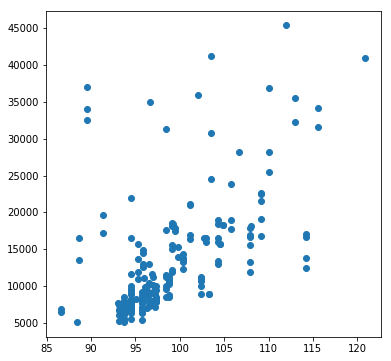

In [26]:
#### Univaraite Analysis of Numerical Variabile 
plt.figure(figsize=[6,6])
plt.scatter(car_price.wheelbase, car_price.price)
plt.show()

###### In General , As Wheel base increase price increases

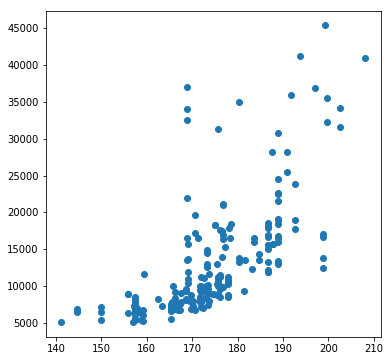

In [27]:
#### Univaraite Analysis of carlength &  price 
plt.figure(figsize=[6,6])
plt.scatter(car_price.carlength , car_price.price)
plt.show()

#### As Car Length increases Price Increases 

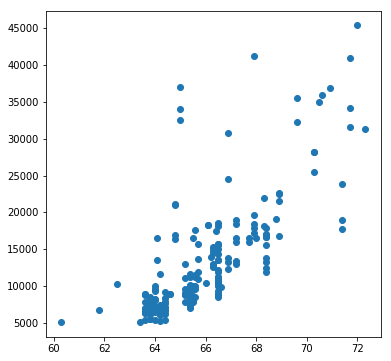

In [28]:
#### Univaraite Analysis of carwidth &  price  
plt.figure(figsize=[6,6])
plt.scatter(car_price.carwidth, car_price.price)
plt.show()

###### As Car Width increases Price Increases 

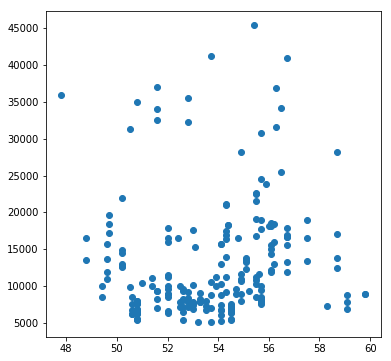

In [29]:
#### Univaraite Analysis of carheight &  price 
plt.figure(figsize=[6,6])
plt.scatter(car_price.carheight, car_price.price)

plt.show()

##### As Car Height does not play significant role in car price

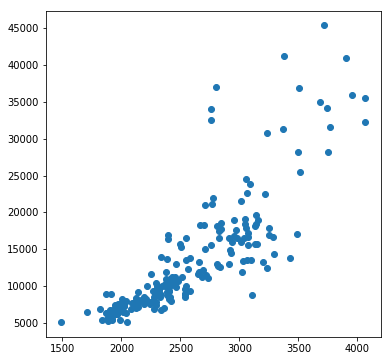

In [30]:
#### Univaraite Analysis of curbweight &  price 
plt.figure(figsize=[6,6])
plt.scatter(car_price.curbweight, car_price.price)
plt.show()

#####  Curb Weight play good role in deciding price , it has positive correlation with price

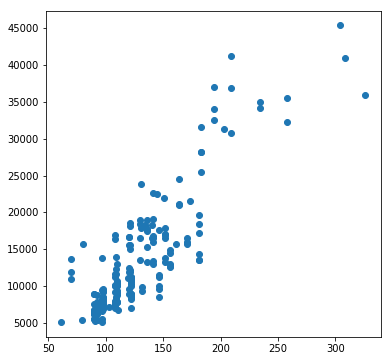

In [31]:
#### Univaraite Analysis of enginesize &  price 
plt.figure(figsize=[6,6])
plt.scatter(car_price.enginesize, car_price.price)
plt.show()

#####  Engine Size also has positive linear relationship with price

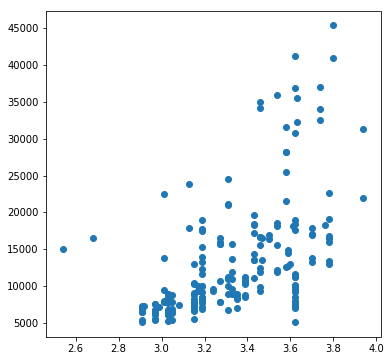

In [32]:
#### Univaraite Analysis of boreratio &  price 
plt.figure(figsize=[6,6])
plt.scatter(car_price.boreratio, car_price.price)
plt.show()

#####  Bore Ration Also has positive impact but very slight

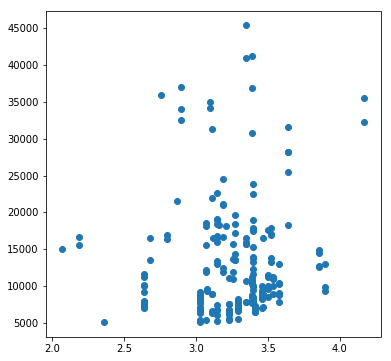

In [33]:
#### Univaraite Analysis of stroke &  price 
plt.figure(figsize=[6,6])
plt.scatter(car_price.stroke, car_price.price)
plt.show()

#####  stroke does not seems to have very good relationship 

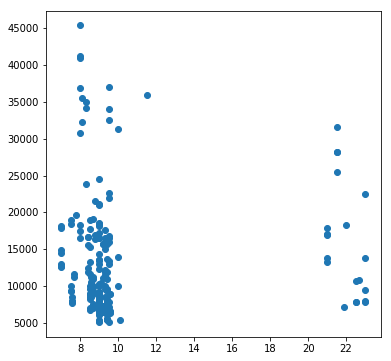

In [34]:
#### Univaraite Analysis of compressionratio &  price 
plt.figure(figsize=[6,6])
plt.scatter(car_price.compressionratio, car_price.price)
plt.show()

##### compressionratio Does not seems to be deciding factor for price

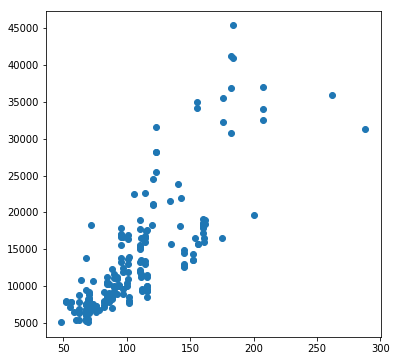

In [35]:
#### Univaraite Analysis of horsepower &  price 
plt.figure(figsize=[6,6])
plt.scatter(car_price.horsepower, car_price.price)
plt.show()

##### HorsePower has good Linear relationship with price 

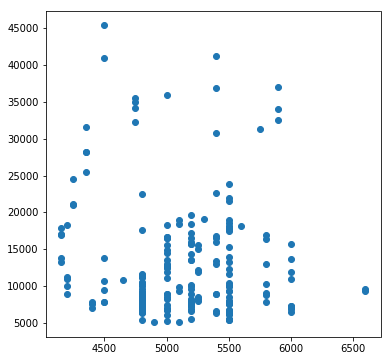

In [36]:
#### Univaraite Analysis of peakrpm &  price 
plt.figure(figsize=[6,6])
plt.scatter(car_price.peakrpm, car_price.price)
plt.show()

##### It is not very Significant 

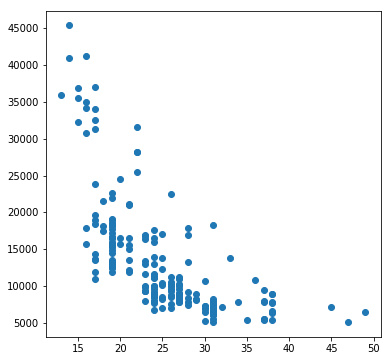

In [37]:
#### Univaraite Analysis of citympg &  price 
plt.figure(figsize=[6,6])
plt.scatter(car_price.citympg, car_price.price)
plt.show()

##### City Mileage increases, price descreases

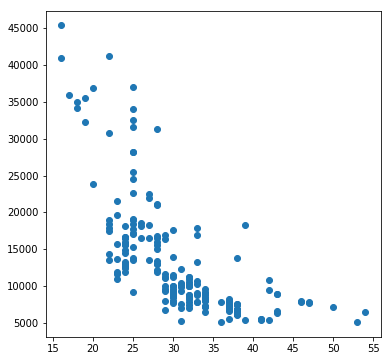

In [38]:
#### Univaraite Analysis of highwaympg &  price 
plt.figure(figsize=[6,6])
plt.scatter(car_price.highwaympg, car_price.price)
plt.show()

##### Highway Mileage increases, price descreases

#### Multivaraite Analysis 

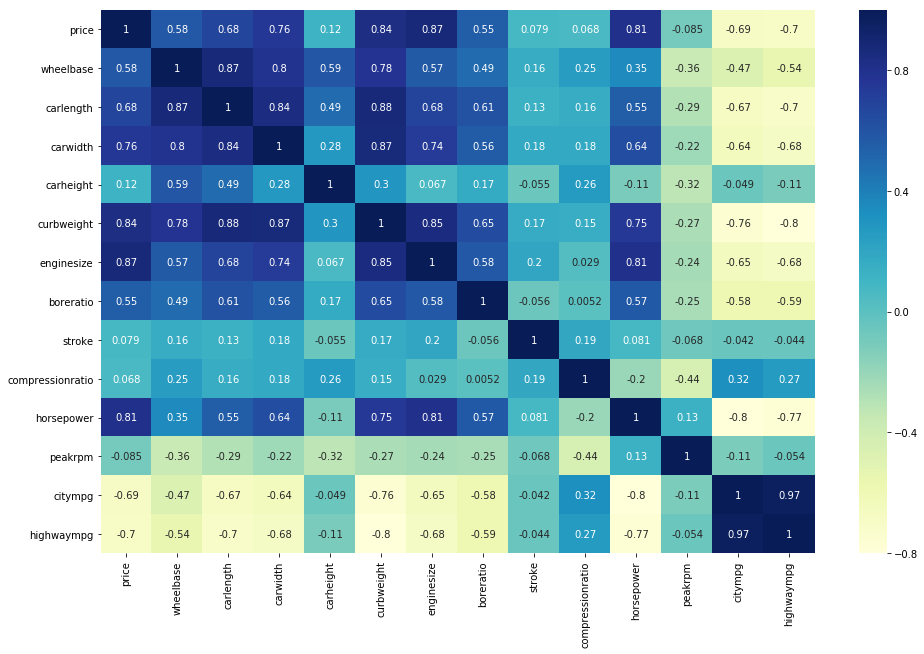

In [39]:
#Draw a Corrleation MArix 
plt.figure(figsize = (16, 10))
sns.heatmap(car_price.corr(), annot = True, cmap="YlGnBu")
plt.show()

In [40]:
#### We can see the Price is very highly Positively correlated with car length, Car width, Curb weight, Engine size, horse power.
#### Price is highly Negative Correlated with City MPG and Highway MPG 
#### Price is MOderate Correlated with Bore ratio and wheel base 
#### The highest correlation is with engine size(0.87)
####  Engine size is also correlated with Curb weight , car length , car width , city mpg and highway mpg
#### So it can be a issue of multicollinarity as well so we have to take care while building model.


## Step 3: Data Preparation

- You can see that your dataset has many columns with values as Categoritical Value

- But in order to fit a regression line, we would need numerical values and not string. Hence, we need to convert them to 1s and 0s

--> Diesel -1
--> Gas    -0
--->Std  -  0
---> turbo - 1
---> front -0
---> rear --1



In [41]:
#List of variables to map

varlist =  ['fueltype', 'aspiration',  'enginelocation']

# Defining the map function
def binary_map(x):
    return x.map({"diesel": 1, "gas": 0 , "std" : 0,"turbo" : 1, "two" : 0 , "four" : 1 , "front" : 0 , "rear" : 1 ,  })

# Applying the function to the car_price set
car_price[varlist] = car_price[varlist].apply(binary_map)

In [42]:
# Check the Car Price dataframe now

car_price.head()

,price,CarName,fueltype,aspiration,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg
0,13495.0,alfa-romero,0,0,convertible,rwd,0,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27
1,16500.0,alfa-romero,0,0,convertible,rwd,0,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27
2,16500.0,alfa-romero,0,0,hatchback,rwd,0,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26
3,13950.0,audi,0,0,sedan,fwd,0,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30
4,17450.0,audi,0,0,sedan,4wd,0,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22


### Dummy Variables

The variable `carbody` has five levels. We need to convert five levels into integer as well. 

For this, we will use something called `dummy variables`.

In [43]:
# Get the dummy variables for the feature 'carbody' and store it in a new variable - 'cartype'
cartype = pd.get_dummies(car_price['carbody'])
drivetype = pd.get_dummies(car_price['drivewheel'])
engtype=pd.get_dummies(car_price['enginetype'])
cyltype= pd.get_dummies(car_price['cylindernumber'])
fueltype= pd.get_dummies(car_price['fuelsystem'])
carnametype = pd.get_dummies(car_price['CarName'])


In [44]:
# Check what the dataset 'cartype' looks like
print(cartype.head())
print(drivetype.head())
print(engtype.head())
print(cyltype.head())
print(fueltype.head())

print(carnametype.head())


   convertible  hardtop  hatchback  sedan  wagon
0            1        0          0      0      0
1            1        0          0      0      0
2            0        0          1      0      0
3            0        0          0      1      0
4            0        0          0      1      0
   4wd  fwd  rwd
0    0    0    1
1    0    0    1
2    0    0    1
3    0    1    0
4    1    0    0
   dohc  dohcv  l  ohc  ohcf  ohcv  rotor
0     1      0  0    0     0     0      0
1     1      0  0    0     0     0      0
2     0      0  0    0     0     1      0
3     0      0  0    1     0     0      0
4     0      0  0    1     0     0      0
   eight  five  four  six  three  twelve  two
0      0     0     1    0      0       0    0
1      0     0     1    0      0       0    0
2      0     0     0    1      0       0    0
3      0     0     1    0      0       0    0
4      0     1     0    0      0       0    0
   1bbl  2bbl  4bbl  idi  mfi  mpfi  spdi  spfi
0     0     0     0    0    

— 


In [45]:
# Let's drop the first column from status df using 'drop_first = True'

cartype = pd.get_dummies(car_price['carbody'], drop_first = True)
drivetype = pd.get_dummies(car_price['drivewheel'], drop_first = True)
engtype = pd.get_dummies(car_price['enginetype'], drop_first = True)
cyltype = pd.get_dummies(car_price['cylindernumber'], drop_first = True)
fueltype = pd.get_dummies(car_price['fuelsystem'], drop_first = True)
carnametype = pd.get_dummies(car_price['CarName'], drop_first = True)






In [46]:
# Add the results to the original  dataframe

car_price = pd.concat([car_price, cartype,drivetype,engtype,cyltype,fueltype ,carnametype], axis = 1)

In [47]:
# Now let's see the head of our dataframe.

car_price.head()

,price,CarName,fueltype,aspiration,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,hardtop,hatchback,sedan,wagon,fwd,rwd,dohcv,l,ohc,ohcf,ohcv,rotor,five,four,six,three,twelve,two,2bbl,4bbl,idi,mfi,mpfi,spdi,spfi,audi,bmw,buick,chevrolet,dodge,honda,isuzu,jaguar,mazda,mercury,mitsubishi,nissan,peugeot,plymouth,porsche,renault,saab,subaru,toyota,volkswagen,volvo
0,13495.0,alfa-romero,0,0,convertible,rwd,0,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,16500.0,alfa-romero,0,0,convertible,rwd,0,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,16500.0,alfa-romero,0,0,hatchback,rwd,0,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,13950.0,audi,0,0,sedan,fwd,0,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,17450.0,audi,0,0,sedan,4wd,0,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [48]:
# Drop 'Column' as we have created the dummies for it

car_price.drop(['carbody','drivewheel', 'enginetype','cylindernumber','fuelsystem','CarName'], axis = 1, inplace = True)



In [49]:
car_price.head()

,price,fueltype,aspiration,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,hardtop,hatchback,sedan,wagon,fwd,rwd,dohcv,l,ohc,ohcf,ohcv,rotor,five,four,six,three,twelve,two,2bbl,4bbl,idi,mfi,mpfi,spdi,spfi,audi,bmw,buick,chevrolet,dodge,honda,isuzu,jaguar,mazda,mercury,mitsubishi,nissan,peugeot,plymouth,porsche,renault,saab,subaru,toyota,volkswagen,volvo
0,13495.0,0,0,0,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,16500.0,0,0,0,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,16500.0,0,0,0,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,13950.0,0,0,0,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,17450.0,0,0,0,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


-- We can rename some Columns for better understanding 

In [50]:
car_price= car_price.rename(columns={'fwd': 'drivewheel_fwd', 'rwd': 'drivewheel_rwd' , 'dohcv': 'enginetype_dohcv' , 
                                    'l': 'enginetype_l','ohc': 'enginetype_ohc','ohcf': 'enginetype_ohcf','ohcv': 'enginetype_ohcv',
                                    'rotor': 'enginetype_rotor','five': 'cylindernumber_five' , 'four': 'cylindernumber_four',
                                    'six': 'cylindernumber_six', 'three': 'cylindernumber_three','twelve': 'cylindernumber_twelve',
                                    'two': 'cylindernumber_two','2bbl': 'fuelsystem_2bbl','4bbl': 'fuelsystem_4bbl','idi': 'fuelsystem_idi' ,
                                    'mfi': 'fuelsystem_mfi','mpfi': 'fuelsystem_mpfi','spdi': 'fuelsystem_spdi','spfi': 'fuelsystem_spfi'})

In [51]:
car_price.head()

,price,fueltype,aspiration,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,hardtop,hatchback,sedan,wagon,drivewheel_fwd,drivewheel_rwd,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi,audi,bmw,buick,chevrolet,dodge,honda,isuzu,jaguar,mazda,mercury,mitsubishi,nissan,peugeot,plymouth,porsche,renault,saab,subaru,toyota,volkswagen,volvo
0,13495.0,0,0,0,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,16500.0,0,0,0,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,16500.0,0,0,0,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,13950.0,0,0,0,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,17450.0,0,0,0,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


#### Outlier Check

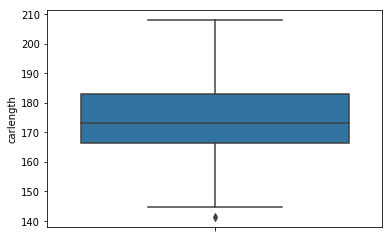

In [52]:
#Distribution of carlength
sns.boxplot(y = 'carlength',data = car_price)

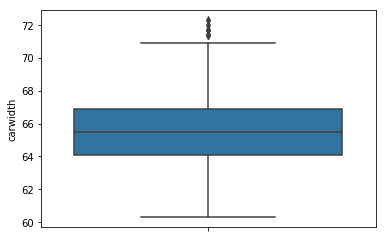

In [53]:
#Distribution of carwidth
sns.boxplot(y = 'carwidth',data = car_price)

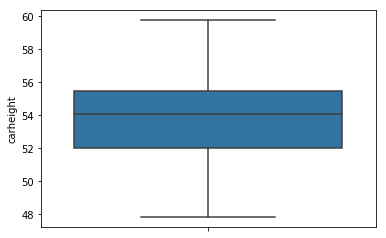

In [54]:
#Distribution of carheight
sns.boxplot(y = 'carheight',data = car_price)

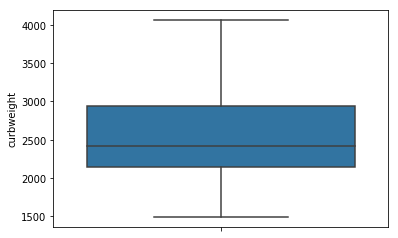

In [55]:
#Distribution of curbweight
sns.boxplot(y = 'curbweight',data = car_price)

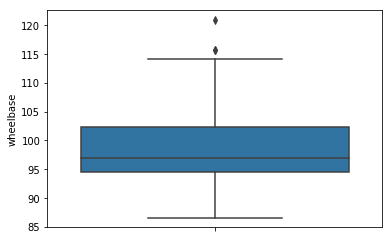

In [56]:
#Distribution of wheelbase
sns.boxplot(y = 'wheelbase',data = car_price)

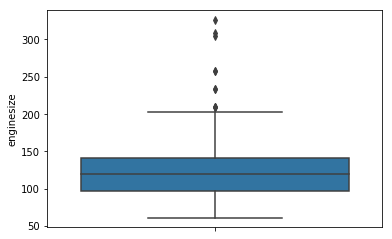

In [57]:
#Distribution of enginesize
sns.boxplot(y = 'enginesize',data = car_price)

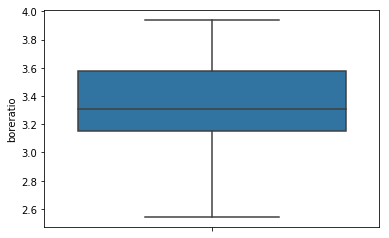

In [58]:
#Distribution of boreratio
sns.boxplot(y = 'boreratio',data = car_price)

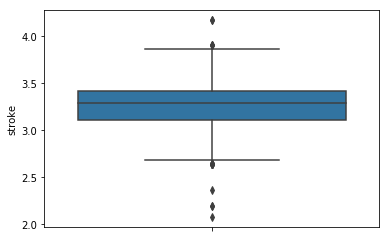

In [59]:
#Distribution of stroke
sns.boxplot(y = 'stroke',data = car_price)

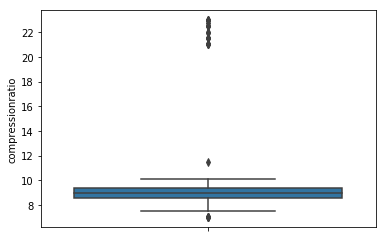

In [60]:
#Distribution of compressionratio
sns.boxplot(y = 'compressionratio',data = car_price)

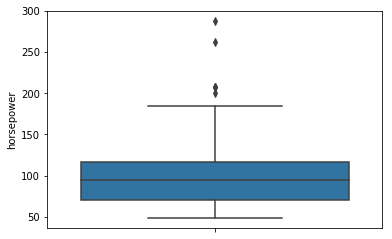

In [61]:
#Distribution of horsepower
sns.boxplot(y = 'horsepower',data = car_price)

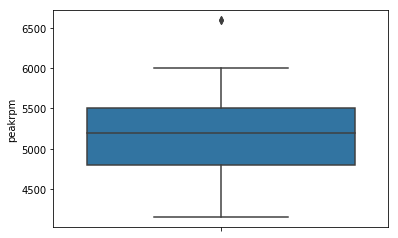

In [62]:

#Distribution of peakrpm
sns.boxplot(y = 'peakrpm',data = car_price)

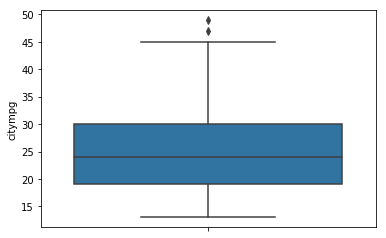

In [63]:
#Distribution of citympg
sns.boxplot(y = 'citympg',data = car_price)

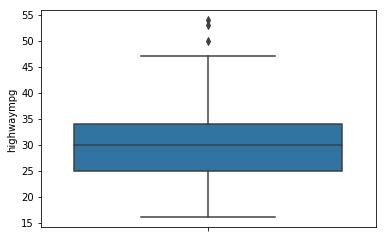

In [64]:
#Distribution of highwaympg
sns.boxplot(y = 'highwaympg',data = car_price)

-We dont see major outlier for numerical variables , there are some high values in some of the numerical data but those are expected due to presence
of high price car and no need to remove any outlier

## Step 4: Splitting the Data into Training and Testing Sets



In [65]:
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
df_train, df_test = train_test_split(car_price, train_size = 0.7, test_size = 0.3, random_state = 100)

In [66]:
from sklearn.preprocessing import MinMaxScaler

In [67]:
scaler = MinMaxScaler()

In [68]:
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
num_vars = ['wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight','enginesize' , 'boreratio' , 'stroke','compressionratio','horsepower',
           'peakrpm','citympg','highwaympg' ,'price']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [69]:
df_train.head()

,price,fueltype,aspiration,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,hardtop,hatchback,sedan,wagon,drivewheel_fwd,drivewheel_rwd,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi,audi,bmw,buick,chevrolet,dodge,honda,isuzu,jaguar,mazda,mercury,mitsubishi,nissan,peugeot,plymouth,porsche,renault,saab,subaru,toyota,volkswagen,volvo
122,0.068818,0,0,0,0.244828,0.426016,0.291667,0.265487,0.272692,0.139623,0.230159,0.525253,0.15000,0.083333,0.551020,0.500000,0.567568,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
125,0.466890,0,0,0,0.272414,0.452033,0.666667,0.212389,0.500388,0.339623,1.000000,0.464646,0.15625,0.395833,0.551020,0.166667,0.270270,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
166,0.122110,0,0,0,0.272414,0.448780,0.308333,0.424779,0.314973,0.139623,0.444444,0.449495,0.15000,0.266667,1.000000,0.361111,0.324324,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,0.314446,0,0,0,0.068966,0.450407,0.316667,0.088496,0.411171,0.260377,0.626984,0.247475,0.12500,0.262500,0.346939,0.222222,0.270270,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
199,0.382131,0,1,0,0.610345,0.775610,0.575000,0.858407,0.647401,0.260377,0.746032,0.484848,0.03125,0.475000,0.387755,0.111111,0.135135,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [70]:
df_train.describe()

,price,fueltype,aspiration,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,hardtop,hatchback,sedan,wagon,drivewheel_fwd,drivewheel_rwd,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi,audi,bmw,buick,chevrolet,dodge,honda,isuzu,jaguar,mazda,mercury,mitsubishi,nissan,peugeot,plymouth,porsche,renault,saab,subaru,toyota,volkswagen,volvo
count,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.0,143.000000,143.000000,143.0,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.0,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000
mean,0.219310,0.090909,0.181818,0.006993,0.411141,0.525476,0.461655,0.509004,0.407878,0.241351,0.497946,0.535389,0.190787,0.227302,0.400029,0.344211,0.374976,0.020979,0.342657,0.475524,0.132867,0.594406,0.349650,0.006993,0.062937,0.685315,0.083916,0.062937,0.027972,0.062937,0.741259,0.132867,0.006993,0.006993,0.027972,0.349650,0.020979,0.090909,0.0,0.440559,0.041958,0.0,0.034965,0.041958,0.034965,0.020979,0.041958,0.062937,0.020979,0.020979,0.090909,0.0,0.062937,0.097902,0.055944,0.027972,0.020979,0.013986,0.020979,0.076923,0.139860,0.048951,0.041958
std,0.215682,0.288490,0.387050,0.083624,0.205581,0.204848,0.184517,0.215378,0.211269,0.154619,0.207140,0.157843,0.237181,0.165511,0.196438,0.186165,0.188477,0.143818,0.476266,0.501156,0.340624,0.492733,0.478536,0.083624,0.243703,0.466023,0.278236,0.243703,0.165472,0.243703,0.439483,0.340624,0.083624,0.083624,0.165472,0.478536,0.143818,0.288490,0.0,0.498199,0.201198,0.0,0.184337,0.201198,0.184337,0.143818,0.201198,0.243703,0.143818,0.143818,0.288490,0.0,0.243703,0.298227,0.230621,0.165472,0.143818,0.117845,0.143818,0.267406,0.348061,0.216524,0.201198
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.067298,0.000000,0.000000,0.000000,0.272414,0.399187,0.304167,0.353982,0.245539,0.135849,0.305556,0.464646,0.100000,0.091667,0.265306,0.166667,0.216216,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.140343,0.000000,0.000000,0.000000,0.341379,0.502439,0.425000,0.522124,0.355702,0.184906,0.500000,0.545455,0.125000,0.191667,0.428571,0.333333,0.378378,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000

In [71]:
df_train.info

<bound method DataFrame.info of         price  fueltype  aspiration  enginelocation  wheelbase  carlength  \
122  0.068818         0           0               0   0.244828   0.426016   
125  0.466890         0           0               0   0.272414   0.452033   
166  0.122110         0           0               0   0.272414   0.448780   
1    0.314446         0           0               0   0.068966   0.450407   
199  0.382131         0           1               0   0.610345   0.775610   
190  0.134321         0           0               0   0.272414   0.400000   
96   0.065779         0           0               0   0.272414   0.393496   
177  0.169351         0           0               0   0.544828   0.560976   
181  0.293726         0           0               0   0.617241   0.759350   
97   0.079592         0           0               0   0.272414   0.473171   
120  0.030693         0           0               0   0.244828   0.263415   
117  0.360030         0           1         

So, we pick `area` as the first variable and we'll try to fit a regression line to that.

### Dividing into X and Y sets for the model building

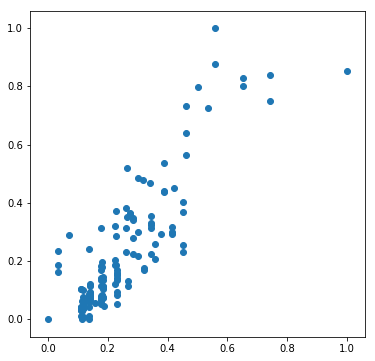

In [72]:
## Scatter Plot for Price and Engine size
plt.figure(figsize=[6,6])
plt.scatter(df_train.enginesize, df_train.price)
plt.show()

In [73]:
y_train = df_train.pop('price')
X_train = df_train

## Step 5: Building a linear model
---- Lets first make a basic model by using only engine size 

- Model1 -By using only Engine Size

In [74]:
import statsmodels.api as sm

# Add a constant
X_train_lm = sm.add_constant(X_train[['enginesize']])

# Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()

In [75]:
# Check the parameters obtained

lr.params

const        -0.072888
enginesize    1.210676
dtype: float64

In [76]:
# Print a summary of the linear regression model obtained
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.753
Model:                            OLS   Adj. R-squared:                  0.752
Method:                 Least Squares   F-statistic:                     430.5
Date:                Sun, 27 Jan 2019   Prob (F-statistic):           1.09e-44
Time:                        10:27:59   Log-Likelihood:                 117.01
No. Observations:                 143   AIC:                            -230.0
Df Residuals:                     141   BIC:                            -224.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0729      0.017     -4.362      0.0

The R-squared value obtained is `0.753`. AS  we have other variable , so we  can = do better than this. So let's go try the second varibale 

-Model 2 -By using Only Curb Weight

In [77]:
# Assign all the feature variables to X
X_train_lm = X_train[[ 'curbweight']]

In [78]:
# Build a linear model

import statsmodels.api as sm
X_train_lm = sm.add_constant(X_train_lm)

lr = sm.OLS(y_train, X_train_lm).fit()

lr.params

const        -0.139568
curbweight    0.879863
dtype: float64

In [79]:
# Check the summary
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.743
Model:                            OLS   Adj. R-squared:                  0.741
Method:                 Least Squares   F-statistic:                     407.2
Date:                Sun, 27 Jan 2019   Prob (F-statistic):           2.06e-43
Time:                        10:28:01   Log-Likelihood:                 114.04
No. Observations:                 143   AIC:                            -224.1
Df Residuals:                     141   BIC:                            -218.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1396      0.020     -6.974      0.0

-Model 3 -By using Only Engine Size and Curb Weight

In [80]:
# Assign all the feature variables to X
X_train_lm = X_train[['enginesize', 'curbweight']]

In [81]:
# Build a linear model

import statsmodels.api as sm
X_train_lm = sm.add_constant(X_train_lm)

lr = sm.OLS(y_train, X_train_lm).fit()

lr.params

const        -0.128113
enginesize    0.678162
curbweight    0.450496
dtype: float64

In [82]:
# Print the summary of the model

print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.802
Model:                            OLS   Adj. R-squared:                  0.799
Method:                 Least Squares   F-statistic:                     284.0
Date:                Sun, 27 Jan 2019   Prob (F-statistic):           5.31e-50
Time:                        10:28:01   Log-Likelihood:                 132.84
No. Observations:                 143   AIC:                            -259.7
Df Residuals:                     140   BIC:                            -250.8
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1281      0.018     -7.239      0.0

--Adjusted R2 has increased up to 0.80 in this case ,We can do make better model by using more variable , lets using another method

## Model3: Residual Analysis of the train data



In [83]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [84]:
# Running RFE with the output number of the variable equal to 10
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 10)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [85]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('fueltype', False, 25),
 ('aspiration', False, 14),
 ('enginelocation', True, 1),
 ('wheelbase', False, 17),
 ('carlength', False, 21),
 ('carwidth', True, 1),
 ('carheight', False, 18),
 ('curbweight', True, 1),
 ('enginesize', True, 1),
 ('boreratio', True, 1),
 ('stroke', False, 2),
 ('compressionratio', False, 26),
 ('horsepower', False, 15),
 ('peakrpm', False, 16),
 ('citympg', False, 39),
 ('highwaympg', False, 27),
 ('hardtop', False, 31),
 ('hatchback', False, 30),
 ('sedan', False, 32),
 ('wagon', False, 33),
 ('drivewheel_fwd', False, 51),
 ('drivewheel_rwd', False, 42),
 ('enginetype_dohcv', False, 12),
 ('enginetype_l', False, 7),
 ('enginetype_ohc', False, 52),
 ('enginetype_ohcf', False, 10),
 ('enginetype_ohcv', False, 41),
 ('enginetype_rotor', False, 3),
 ('cylindernumber_five', False, 5),
 ('cylindernumber_four', False, 4),
 ('cylindernumber_six', False, 29),
 ('cylindernumber_three', True, 1),
 ('cylindernumber_twelve', True, 1),
 ('cylindernumber_two', True, 1),


In [86]:
col = X_train.columns[rfe.support_]
col

Index(['enginelocation', 'carwidth', 'curbweight', 'enginesize', 'boreratio',
       'cylindernumber_three', 'cylindernumber_twelve', 'cylindernumber_two',
       'bmw', 'porsche'],
      dtype='object')

In [87]:
X_train.columns[~rfe.support_]


Index(['fueltype', 'aspiration', 'wheelbase', 'carlength', 'carheight',
       'stroke', 'compressionratio', 'horsepower', 'peakrpm', 'citympg',
       'highwaympg', 'hardtop', 'hatchback', 'sedan', 'wagon',
       'drivewheel_fwd', 'drivewheel_rwd', 'enginetype_dohcv', 'enginetype_l',
       'enginetype_ohc', 'enginetype_ohcf', 'enginetype_ohcv',
       'enginetype_rotor', 'cylindernumber_five', 'cylindernumber_four',
       'cylindernumber_six', 'fuelsystem_2bbl', 'fuelsystem_4bbl',
       'fuelsystem_idi', 'fuelsystem_mfi', 'fuelsystem_mpfi',
       'fuelsystem_spdi', 'fuelsystem_spfi', 'audi', 'buick', 'chevrolet',
       'dodge', 'honda', 'isuzu', 'jaguar', 'mazda', 'mercury', 'mitsubishi',
       'nissan', 'peugeot', 'plymouth', 'renault', 'saab', 'subaru', 'toyota',
       'volkswagen', 'volvo'],
      dtype='object')

In [88]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [89]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_rfe = sm.add_constant(X_train_rfe)

In [90]:
lm = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model

In [91]:
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.912
Model:                            OLS   Adj. R-squared:                  0.906
Method:                 Least Squares   F-statistic:                     137.1
Date:                Sun, 27 Jan 2019   Prob (F-statistic):           1.21e-64
Time:                        10:28:04   Log-Likelihood:                 190.87
No. Observations:                 143   AIC:                            -359.7
Df Residuals:                     132   BIC:                            -327.1
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.15

In [92]:
#Lets drop cylindernumber_twelve as it p value is more than 0.05
X = X_train_rfe.drop('cylindernumber_twelve' , 1, inplace = True)
   

In [93]:
# Adding a constant variable 
import statsmodels.api as sm
X_train_lm = sm.add_constant(X_train_rfe)

lr_1 = sm.OLS(y_train, X_train_lm).fit()

print(lr_1.params)
print(lr_1.summary())


const                  -0.158738
enginelocation          0.334754
carwidth                0.330294
curbweight              0.312615
enginesize              0.538869
boreratio              -0.107529
cylindernumber_three    0.179278
cylindernumber_two      0.148542
bmw                     0.248987
porsche                 0.159553
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.912
Model:                            OLS   Adj. R-squared:                  0.906
Method:                 Least Squares   F-statistic:                     152.9
Date:                Sun, 27 Jan 2019   Prob (F-statistic):           1.18e-65
Time:                        10:28:04   Log-Likelihood:                 190.63
No. Observations:                 143   AIC:                            -361.3
Df Residuals:                     133   BIC:                            -331.6
Df Model:              

In [94]:
#Lets drop cylindernumber_three as it p value is more than 0.05
X = X_train_rfe.drop('cylindernumber_three' , 1, inplace = True)


In [95]:
import statsmodels.api as sm
X_train_lm = sm.add_constant(X_train_rfe)

lr_1 = sm.OLS(y_train, X_train_lm).fit()

print(lr_1.params)
print(lr_1.summary())


const                -0.147836
enginelocation        0.323291
carwidth              0.303600
curbweight            0.321000
enginesize            0.542080
boreratio            -0.110650
cylindernumber_two    0.148120
bmw                   0.248049
porsche               0.167460
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.907
Model:                            OLS   Adj. R-squared:                  0.902
Method:                 Least Squares   F-statistic:                     163.9
Date:                Sun, 27 Jan 2019   Prob (F-statistic):           2.55e-65
Time:                        10:28:05   Log-Likelihood:                 187.00
No. Observations:                 143   AIC:                            -356.0
Df Residuals:                     134   BIC:                            -329.3
Df Model:                           8                                     

In [96]:
## Check VIF
# Check for the VIF values of the feature variables. 
def VIF_model ():
    from statsmodels.stats.outliers_influence import variance_inflation_factor
    vif = pd.DataFrame()
    vif['Features'] = X_train_lm.columns
    vif['VIF'] = [variance_inflation_factor(X_train_lm.values, i) for i in range(X_train_lm.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    print(vif)

In [97]:
VIF_model()

             Features    VIF
0               const  10.59
3          curbweight   8.62
4          enginesize   5.13
2            carwidth   4.80
5           boreratio   1.85
8             porsche   1.80
1      enginelocation   1.65
6  cylindernumber_two   1.17
7                 bmw   1.09


In [98]:
## Drop Born Ratio
X = X_train_rfe.drop('boreratio' , 1, inplace = True)
import statsmodels.api as sm
X_train_lm = sm.add_constant(X_train_rfe)

lr_1 = sm.OLS(y_train, X_train_lm).fit()

print(lr_1.params)
print(lr_1.summary())

const                -0.174393
enginelocation        0.328918
carwidth              0.296652
curbweight            0.254757
enginesize            0.553736
cylindernumber_two    0.143940
bmw                   0.244379
porsche               0.124756
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.901
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     175.9
Date:                Sun, 27 Jan 2019   Prob (F-statistic):           1.32e-64
Time:                        10:28:05   Log-Likelihood:                 182.43
No. Observations:                 143   AIC:                            -348.9
Df Residuals:                     135   BIC:                            -325.2
Df Model:                           7                                         
Covariance Type:          

In [99]:
import statsmodels.api as sm
X_train_lm = sm.add_constant(X_train_rfe)

lr_1 = sm.OLS(y_train, X_train_lm).fit()

print(lr_1.params)
print(lr_1.summary())

const                -0.174393
enginelocation        0.328918
carwidth              0.296652
curbweight            0.254757
enginesize            0.553736
cylindernumber_two    0.143940
bmw                   0.244379
porsche               0.124756
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.901
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     175.9
Date:                Sun, 27 Jan 2019   Prob (F-statistic):           1.32e-64
Time:                        10:28:06   Log-Likelihood:                 182.43
No. Observations:                 143   AIC:                            -348.9
Df Residuals:                     135   BIC:                            -325.2
Df Model:                           7                                         
Covariance Type:          

In [100]:
VIF_model()

             Features   VIF
0               const  8.10
3          curbweight  7.94
4          enginesize  5.12
2            carwidth  4.79
7             porsche  1.67
1      enginelocation  1.65
5  cylindernumber_two  1.17
6                 bmw  1.09


In [101]:
X = X_train_rfe.drop('curbweight' , 1, inplace = True)
import statsmodels.api as sm
X_train_lm = sm.add_constant(X_train_rfe)

lr_1 = sm.OLS(y_train, X_train_lm).fit()

print(lr_1.params)
print(lr_1.summary())

const                -0.181789
enginelocation        0.351145
carwidth              0.443717
enginesize            0.732991
cylindernumber_two    0.168613
bmw                   0.246325
porsche               0.087662
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.893
Model:                            OLS   Adj. R-squared:                  0.889
Method:                 Least Squares   F-statistic:                     189.8
Date:                Sun, 27 Jan 2019   Prob (F-statistic):           1.55e-63
Time:                        10:28:06   Log-Likelihood:                 176.97
No. Observations:                 143   AIC:                            -339.9
Df Residuals:                     136   BIC:                            -319.2
Df Model:                           6                                         
Covariance Type:            nonrobust                    

In [102]:
X = X_train_rfe.drop('porsche' , 1, inplace = True)
import statsmodels.api as sm
X_train_lm = sm.add_constant(X_train_rfe)

lr_1 = sm.OLS(y_train, X_train_lm).fit()

print(lr_1.params)
print(lr_1.summary())

const                -0.186991
enginelocation        0.439993
carwidth              0.460619
enginesize            0.727802
cylindernumber_two    0.166434
bmw                   0.244664
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.891
Model:                            OLS   Adj. R-squared:                  0.887
Method:                 Least Squares   F-statistic:                     224.4
Date:                Sun, 27 Jan 2019   Prob (F-statistic):           3.81e-64
Time:                        10:28:06   Log-Likelihood:                 175.54
No. Observations:                 143   AIC:                            -339.1
Df Residuals:                     137   BIC:                            -321.3
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
         

In [103]:
VIF_model()

             Features   VIF
0               const  7.67
3          enginesize  3.01
2            carwidth  2.68
4  cylindernumber_two  1.12
5                 bmw  1.09
1      enginelocation  1.08


##Residual Analysis of the train data

In [104]:
y_train_price = lr_1.predict(X_train_lm)

### Residual Analysis of the train data

Text(0.5,0,'Errors')

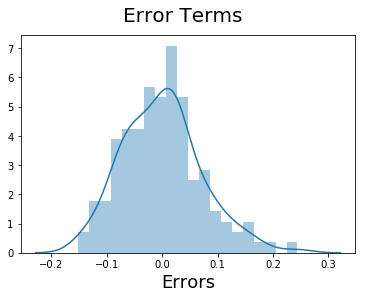

In [105]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_price), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

---- Error Terms are approximelty normally distrbiuted 

### Making Predictions Using the Final Model

In [106]:

num_vars = ['wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight','enginesize' , 'boreratio' , 'stroke','compressionratio','horsepower',
           'peakrpm','citympg','highwaympg' ,'price']

df_test[num_vars] = scaler.fit_transform(df_test[num_vars])


In [107]:
y_test = df_test.pop('price')
X_test = df_test

In [108]:
X_train_lm.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 143 entries, 122 to 8
Data columns (total 6 columns):
const                 143 non-null float64
enginelocation        143 non-null int64
carwidth              143 non-null float64
enginesize            143 non-null float64
cylindernumber_two    143 non-null uint8
bmw                   143 non-null uint8
dtypes: float64(3), int64(1), uint8(2)
memory usage: 5.9 KB


In [109]:

X_test_m = sm.add_constant(X_test)
X_test_m.drop(['fueltype', 'aspiration', 'wheelbase', 'carlength', 'carheight',
       'stroke', 'compressionratio', 'horsepower', 'peakrpm', 'citympg',
       'highwaympg', 'hardtop', 'hatchback', 'sedan', 'wagon',
       'drivewheel_fwd', 'drivewheel_rwd', 'enginetype_dohcv', 'enginetype_l',
       'enginetype_ohc', 'enginetype_ohcf', 'enginetype_ohcv',
       'enginetype_rotor', 'cylindernumber_five', 'cylindernumber_four',
       'cylindernumber_six', 'fuelsystem_2bbl', 'fuelsystem_4bbl',
       'fuelsystem_idi', 'fuelsystem_mfi', 'fuelsystem_mpfi',
       'fuelsystem_spdi', 'fuelsystem_spfi', 'audi', 'buick', 'chevrolet',
       'dodge', 'honda', 'isuzu', 'jaguar', 'mazda', 'mercury', 'mitsubishi',
       'nissan', 'peugeot', 'plymouth', 'renault', 'saab', 'subaru', 'toyota',
       'volkswagen', 'volvo'],axis=1, inplace = True)

X_test_m.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 62 entries, 160 to 128
Data columns (total 11 columns):
const                    62 non-null float64
enginelocation           62 non-null int64
carwidth                 62 non-null float64
curbweight               62 non-null float64
enginesize               62 non-null float64
boreratio                62 non-null float64
cylindernumber_three     62 non-null uint8
cylindernumber_twelve    62 non-null uint8
cylindernumber_two       62 non-null uint8
bmw                      62 non-null uint8
porsche                  62 non-null uint8
dtypes: float64(5), int64(1), uint8(5)
memory usage: 3.7 KB


In [110]:



X_test_m.drop(['curbweight','boreratio', 'cylindernumber_three','cylindernumber_twelve','porsche' ''],axis=1, inplace = True)



y_pred_lm = lr_1.predict(X_test_m)


Text(0,0.5,'Car Price')

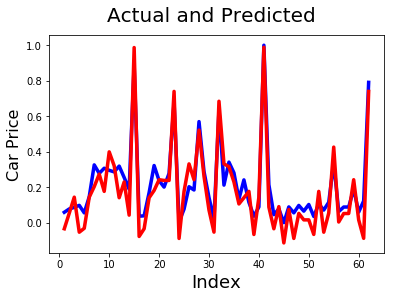

In [111]:
#Actual vs Predicted
c = [i for i in range(1,63,1)]
fig = plt.figure()
plt.plot(c,y_test, color="blue", linewidth=3.5, linestyle="-")     #Plotting Actual
plt.plot(c,y_pred_lm, color="red",  linewidth=3.5, linestyle="-")  #Plotting predicted
fig.suptitle('Actual and Predicted', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=18)                               # X-label
plt.ylabel('Car Price', fontsize=16) 

- Error and Predicted Value almost similar with small variance

## Step 9: Model Evaluation

Let's now plot the graph for actual versus predicted values.

Text(0,0.5,'y_pred')

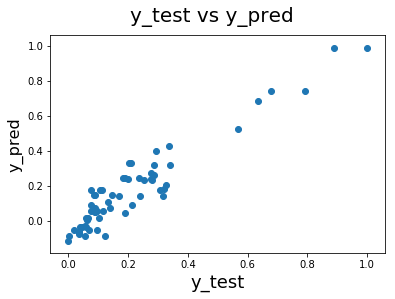

In [112]:
#Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred_lm)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)  

We can see that the equation of our best fitted line is for car price:
# Car price = 0.44  \times  enginelocation + 0.4606  \times  carwidth + 0.7278 \times enginesize + 0.1664 \times cylindernumber_two + 0.2447 \times bmw - 0.1870 

Text(0,0.5,'ytest-ypred')

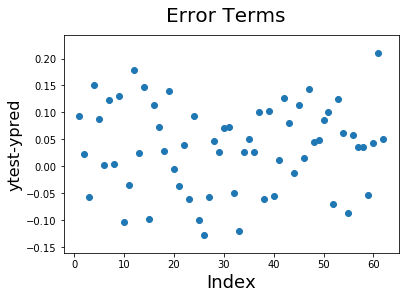

In [113]:
# Error terms
fig = plt.figure()
c = [i for i in range(1,63,1)]
# plt.plot(c,y_test-y_pred_m9, color="blue", linewidth=2.5, linestyle="-")
plt.scatter(c,y_test-y_pred_lm)

fig.suptitle('Error Terms', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=18)                      # X-label
plt.ylabel('ytest-ypred', fontsize=16)                # Y-label

Making Predictions

#### Applying the scaling on the test sets

Text(0,0.5,'Index')

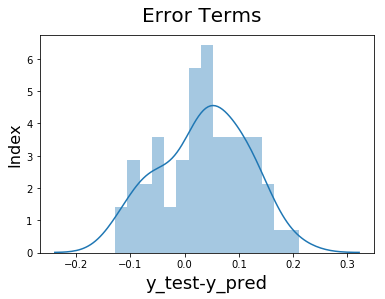

In [114]:
# Plotting the error terms to understand the distribution.
fig = plt.figure()
sns.distplot((y_test-y_pred_lm),bins=15)
fig.suptitle('Error Terms', fontsize=20)                  # Plot heading 
plt.xlabel('y_test-y_pred', fontsize=18)                  # X-label
plt.ylabel('Index', fontsize=16) 

### Calculating R-squared score on the test set

In [115]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred_lm)


0.8286146770148783

We have a decent model, but we also acknowledge that we can always do better by below options 
1. Adding new features 
2. Building a non-linear model

### Below Variables are significant in predicting the price of the car -
 - enginelocation
 - carwidth               
 - enginesize             
 - cylindernumber_two     
 - bmw
 #####  Car price = 0.44  \times  enginelocation + 0.4606  \times  carwidth + 0.7278 \times enginesize + 0.1664 \times cylindernumber_two + 0.2447 \times bmw - 0.1870 
 